In [1]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import datetime as dt
import numpy as np
import re
import nltk



C:\Users\kevin\anaconda3\envs\Pythondata\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kevin\anaconda3\envs\Pythondata\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kevin\anaconda3\envs\Pythondata\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kevin\anaconda3\envs\Pythondata\lib\site-packages

In [2]:
biden_1_debate_df = pd.read_csv("Resources/Biden_First_Debate_2020.csv")

C:\Users\kevin\anaconda3\envs\Pythondata\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
biden_1_debate_df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.288620e+18,dailyphoenix1,Daily Phoenix,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '832376325306359808', 'username': ...",NaN,NaN,NaN,NaN
1,1.311460e+18,1.311130e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.278010e+18,maya73863414,maya,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '956360508575232002', 'username': ...",NaN,NaN,NaN,NaN
2,1.311460e+18,1.311420e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.723769e+07,wesatkinson,Big Wes,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '939091', 'username': 'JoeBiden'}",NaN,NaN,NaN,NaN
3,1.311460e+18,1.311460e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.544081e+08,woodrow823,Woodrow,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN
4,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,3.060555e+08,sadie_75resist,😷SADIE💙2020 BLUE WAVE💙,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '1249416438051246080', 'username':...",NaN,NaN,NaN,NaN


In [4]:
biden_1_debate_df.dtypes

id                 float64
conversation_id    float64
created_at          object
date                object
time                object
timezone             int64
user_id            float64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet            float64
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [5]:
biden_1_debate_df.isnull().sum(axis = 0)

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                   50
place              536201
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet            536260
quote_url          504852
video                   0
thumbnail          475276
near               536260
geo                536260
source             536260
user_rt_id         536260
user_rt            536260
retweet_id         536260
reply_to                0
retweet_date       536260
translate          536260
trans_src          536260
trans_dest         536260
dtype: int64

In [6]:

biden_1_debate_df.retweet.value_counts()

Series([], Name: retweet, dtype: int64)

In [7]:
biden_1_debate_df.shape

(536260, 36)

In [8]:
columns = ["place", "retweet", "quote_url", "near", "geo", "source", "user_rt_id", "user_rt", "retweet_date", "retweet_id", "translate", "trans_src", "trans_dest"]

In [9]:

biden_1_debate_df.drop(columns, axis=1, inplace=True)

In [10]:
biden_1_debate_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to
0,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.288620e+18,dailyphoenix1,Daily Phoenix,@kathyhoffman_az @JoeBiden Should we have CRT ...,...,[],1,0,2,[],[],https://twitter.com/DailyPhoenix1/status/13114...,0,NaN,"{'user_id': '832376325306359808', 'username': ..."
1,1.311460e+18,1.311130e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.278010e+18,maya73863414,maya,@Rocket54441 @JoeBiden Literally trump but ok,...,[],0,0,0,[],[],https://twitter.com/maya73863414/status/131145...,0,NaN,"{'user_id': '956360508575232002', 'username': ..."
2,1.311460e+18,1.311420e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.723769e+07,wesatkinson,Big Wes,@JoeBiden @MonicaLewinsky https://t.co/Wni5F0WJHt,...,['https://pbs.twimg.com/media/EjM6FGwXgAEhUL3....,0,0,2,[],[],https://twitter.com/wesatkinson/status/1311455...,1,https://pbs.twimg.com/media/EjM6FGwXgAEhUL3.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}"
3,1.311460e+18,1.311460e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.544081e+08,woodrow823,Woodrow,Pres. you missed the op to mention HBCU. @Joe...,...,[],0,0,0,['blackvote'],[],https://twitter.com/woodrow823/status/13114557...,0,NaN,"{'user_id': None, 'username': None}"
4,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,3.060555e+08,sadie_75resist,😷SADIE💙2020 BLUE WAVE💙,@Jillbiden46 @JoeBiden ❤️ #VoteBidenHarris2020...,...,['https://pbs.twimg.com/tweet_video_thumb/EjM6...,0,0,0,"['votebidenharris2020', 'voteearly', 'votebide...",[],https://twitter.com/Sadie_75Resist/status/1311...,1,https://pbs.twimg.com/tweet_video_thumb/EjM6FP...,"{'user_id': '1249416438051246080', 'username':..."


In [11]:
def cleaned_tweet (row):
    clean_tweet=row["tweet"]
    s = []
    for word in clean_tweet.split():
        if '@' not in word and 'https' not in word and '#' not in word:
            s.append(word)
    return (' ').join(s)

In [12]:
def label_na (row):
    if len(row['cleaned_tweet'].strip())==0: 
        return np.NaN
    else:
        return row["cleaned_tweet"]

In [13]:

biden_1_debate_df["cleaned_tweet"]=biden_1_debate_df.apply (lambda row: cleaned_tweet(row), axis=1)

In [14]:
biden_1_debate_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,cleaned_tweet
0,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.288620e+18,dailyphoenix1,Daily Phoenix,@kathyhoffman_az @JoeBiden Should we have CRT ...,...,1,0,2,[],[],https://twitter.com/DailyPhoenix1/status/13114...,0,NaN,"{'user_id': '832376325306359808', 'username': ...",Should we have CRT in schools? We need a leader.
1,1.311460e+18,1.311130e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.278010e+18,maya73863414,maya,@Rocket54441 @JoeBiden Literally trump but ok,...,0,0,0,[],[],https://twitter.com/maya73863414/status/131145...,0,NaN,"{'user_id': '956360508575232002', 'username': ...",Literally trump but ok
2,1.311460e+18,1.311420e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.723769e+07,wesatkinson,Big Wes,@JoeBiden @MonicaLewinsky https://t.co/Wni5F0WJHt,...,0,0,2,[],[],https://twitter.com/wesatkinson/status/1311455...,1,https://pbs.twimg.com/media/EjM6FGwXgAEhUL3.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",
3,1.311460e+18,1.311460e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.544081e+08,woodrow823,Woodrow,Pres. you missed the op to mention HBCU. @Joe...,...,0,0,0,['blackvote'],[],https://twitter.com/woodrow823/status/13114557...,0,NaN,"{'user_id': None, 'username': None}",Pres. you missed the op to mention HBCU. obvio...
4,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,3.060555e+08,sadie_75resist,😷SADIE💙2020 BLUE WAVE💙,@Jillbiden46 @JoeBiden ❤️ #VoteBidenHarris2020...,...,0,0,0,"['votebidenharris2020', 'voteearly', 'votebide...",[],https://twitter.com/Sadie_75Resist/status/1311...,1,https://pbs.twimg.com/tweet_video_thumb/EjM6FP...,"{'user_id': '1249416438051246080', 'username':...",❤️ ❤️


In [15]:

import re

In [16]:

biden_1_debate_df['cleaned_tweet'] = biden_1_debate_df['cleaned_tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [17]:
biden_1_debate_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,cleaned_tweet
0,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.288620e+18,dailyphoenix1,Daily Phoenix,@kathyhoffman_az @JoeBiden Should we have CRT ...,...,1,0,2,[],[],https://twitter.com/DailyPhoenix1/status/13114...,0,NaN,"{'user_id': '832376325306359808', 'username': ...",Should we have CRT in schools We need a leader.
1,1.311460e+18,1.311130e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.278010e+18,maya73863414,maya,@Rocket54441 @JoeBiden Literally trump but ok,...,0,0,0,[],[],https://twitter.com/maya73863414/status/131145...,0,NaN,"{'user_id': '956360508575232002', 'username': ...",Literally trump but ok
2,1.311460e+18,1.311420e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.723769e+07,wesatkinson,Big Wes,@JoeBiden @MonicaLewinsky https://t.co/Wni5F0WJHt,...,0,0,2,[],[],https://twitter.com/wesatkinson/status/1311455...,1,https://pbs.twimg.com/media/EjM6FGwXgAEhUL3.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",
3,1.311460e+18,1.311460e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.544081e+08,woodrow823,Woodrow,Pres. you missed the op to mention HBCU. @Joe...,...,0,0,0,['blackvote'],[],https://twitter.com/woodrow823/status/13114557...,0,NaN,"{'user_id': None, 'username': None}",Pres. you missed the op to mention HBCU. obvio...
4,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,3.060555e+08,sadie_75resist,😷SADIE💙2020 BLUE WAVE💙,@Jillbiden46 @JoeBiden ❤️ #VoteBidenHarris2020...,...,0,0,0,"['votebidenharris2020', 'voteearly', 'votebide...",[],https://twitter.com/Sadie_75Resist/status/1311...,1,https://pbs.twimg.com/tweet_video_thumb/EjM6FP...,"{'user_id': '1249416438051246080', 'username':...",


In [18]:
len(biden_1_debate_df['cleaned_tweet'][4].strip())

0

In [19]:

biden_1_debate_df["cleaned_tweet"]=biden_1_debate_df.apply (lambda row: label_na(row), axis=1)

In [20]:
biden_1_debate_df.head()


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,cleaned_tweet
0,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.288620e+18,dailyphoenix1,Daily Phoenix,@kathyhoffman_az @JoeBiden Should we have CRT ...,...,1,0,2,[],[],https://twitter.com/DailyPhoenix1/status/13114...,0,NaN,"{'user_id': '832376325306359808', 'username': ...",Should we have CRT in schools We need a leader.
1,1.311460e+18,1.311130e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.278010e+18,maya73863414,maya,@Rocket54441 @JoeBiden Literally trump but ok,...,0,0,0,[],[],https://twitter.com/maya73863414/status/131145...,0,NaN,"{'user_id': '956360508575232002', 'username': ...",Literally trump but ok
2,1.311460e+18,1.311420e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.723769e+07,wesatkinson,Big Wes,@JoeBiden @MonicaLewinsky https://t.co/Wni5F0WJHt,...,0,0,2,[],[],https://twitter.com/wesatkinson/status/1311455...,1,https://pbs.twimg.com/media/EjM6FGwXgAEhUL3.jpg,"{'user_id': '939091', 'username': 'JoeBiden'}",NaN
3,1.311460e+18,1.311460e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.544081e+08,woodrow823,Woodrow,Pres. you missed the op to mention HBCU. @Joe...,...,0,0,0,['blackvote'],[],https://twitter.com/woodrow823/status/13114557...,0,NaN,"{'user_id': None, 'username': None}",Pres. you missed the op to mention HBCU. obvio...
4,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,3.060555e+08,sadie_75resist,😷SADIE💙2020 BLUE WAVE💙,@Jillbiden46 @JoeBiden ❤️ #VoteBidenHarris2020...,...,0,0,0,"['votebidenharris2020', 'voteearly', 'votebide...",[],https://twitter.com/Sadie_75Resist/status/1311...,1,https://pbs.twimg.com/tweet_video_thumb/EjM6FP...,"{'user_id': '1249416438051246080', 'username':...",NaN


In [21]:
biden_1_debate_df = biden_1_debate_df[biden_1_debate_df['cleaned_tweet'].notna()]

In [22]:
biden_1_debate_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,cleaned_tweet
0,1.311460e+18,1.311400e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.288620e+18,dailyphoenix1,Daily Phoenix,@kathyhoffman_az @JoeBiden Should we have CRT ...,...,1,0,2,[],[],https://twitter.com/DailyPhoenix1/status/13114...,0,NaN,"{'user_id': '832376325306359808', 'username': ...",Should we have CRT in schools We need a leader.
1,1.311460e+18,1.311130e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.278010e+18,maya73863414,maya,@Rocket54441 @JoeBiden Literally trump but ok,...,0,0,0,[],[],https://twitter.com/maya73863414/status/131145...,0,NaN,"{'user_id': '956360508575232002', 'username': ...",Literally trump but ok
3,1.311460e+18,1.311460e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.544081e+08,woodrow823,Woodrow,Pres. you missed the op to mention HBCU. @Joe...,...,0,0,0,['blackvote'],[],https://twitter.com/woodrow823/status/13114557...,0,NaN,"{'user_id': None, 'username': None}",Pres. you missed the op to mention HBCU. obvio...
5,1.311460e+18,1.311460e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,3.356462e+07,reneechelle20,Renee 🇨🇦 🇺🇸,@CNNPolitics @JoeBiden @TheView @JoyVBehar @An...,...,0,0,0,[],[],https://twitter.com/Reneechelle20/status/13114...,0,NaN,"{'user_id': '13850422', 'username': 'CNNPoliti...",THIS IS ANTIFA
6,1.311460e+18,1.311460e+18,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,2.365115e+08,monkjona,Monk Áedán Shaun,#JoniMitchell - #SexKills https://t.co/NiRYkTO...,...,0,0,0,"['jonimitchell', 'sexkills', 'trumpworld', 'ep...",[],https://twitter.com/monkjona/status/1311455784...,0,NaN,"{'user_id': None, 'username': None}",-


In [23]:
biden_1_debate_df.to_csv('super_clean_biden_1.csv', index = False)

In [24]:
biden_1_debate_df.shape

(490976, 24)

In [25]:
biden_Test_debate_df = pd.read_csv("Resources/super_clean_biden_1_example.csv")

In [26]:
biden_Test_debate_df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,cleaned_tweet
0,1311460000000000000,1311400000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.290000e+18,dailyphoenix1,Daily Phoenix,@kathyhoffman_az @JoeBiden Should we have CRT ...,...,1,0,2,[],[],https://twitter.com/DailyPhoenix1/status/13114...,0,NaN,"{'user_id': '832376325306359808', 'username': ...",Should we have CRT in schools We need a leader.
1,1311460000000000000,1311130000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.280000e+18,maya73863414,maya,@Rocket54441 @JoeBiden Literally trump but ok,...,0,0,0,[],[],https://twitter.com/maya73863414/status/131145...,0,NaN,"{'user_id': '956360508575232002', 'username': ...",Literally trump but ok
2,1311460000000000000,1311460000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.544081e+08,woodrow823,Woodrow,Pres. you missed the op to mention HBCU. @Joe...,...,0,0,0,['blackvote'],[],https://twitter.com/woodrow823/status/13114557...,0,NaN,"{'user_id': None, 'username': None}",Pres. you missed the op to mention HBCU. obvio...
3,1311460000000000000,1311460000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,3.356462e+07,reneechelle20,Renee 🇨🇦 🇺🇸,@CNNPolitics @JoeBiden @TheView @JoyVBehar @An...,...,0,0,0,[],[],https://twitter.com/Reneechelle20/status/13114...,0,NaN,"{'user_id': '13850422', 'username': 'CNNPoliti...",THIS IS ANTIFA
4,1311460000000000000,1311460000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,2.365115e+08,monkjona,Monk Áedán Shaun,#JoniMitchell - #SexKills https://t.co/NiRYkTO...,...,0,0,0,"['jonimitchell', 'sexkills', 'trumpworld', 'ep...",[],https://twitter.com/monkjona/status/1311455784...,0,NaN,"{'user_id': None, 'username': None}",-


In [27]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(biden_Test_debate_df, x="likes_count")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=5.5)
fig.update_layout(title_text='Tweets')
fig.show()

In [28]:
from textblob import TextBlob

In [29]:

Feedback1 = "KamalaHarris Yeah for the worse We need a productive President one who stands for us all The ONLY MAN FOR THE JOB IS DONALD J TRUMP TRUMP 2020 TRUMP JR 2024"
Feedback2 = "realDonaldTrump The 2020 election is a matter of life and death. So vote like your life depends on it BidenHarris2020 "
Feedback3 = "realDonaldTrump Hell no VoteBlueToEndThisNightmare VoteBidenHarris2020 VoteBidenHarrisToSaveAmerica"
Feedback4 = "Contrary to what the pundits in the mainstream media would have you believe, President Donald Trump obliterated Joe Biden in the presidential debate on Tuesday night, and it really was not even close."
Feedback5 = "Donald Trump is amazing.  He is the greatest president ever, Joe Biden is a racist, downright stupid, ignorant human being."

blob1 = TextBlob(Feedback1)
blob2 = TextBlob(Feedback2)
blob3 = TextBlob(Feedback3)
blob4 = TextBlob(Feedback4)
blob5 = TextBlob(Feedback5)

print(blob1.sentiment)
print(blob2.sentiment)
print(blob3.sentiment)
print(blob4.sentiment)
print(blob5.sentiment)

Sentiment(polarity=-0.2, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.20000000000000004, subjectivity=0.75)


In [30]:

import nltk
import string
import pandas as pd

from collections import Counter
import matplotlib.pyplot as plt

In [39]:
biden_Test_debate_df.head(50)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,cleaned_tweet
0,1311460000000000000,1311400000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.290000e+18,dailyphoenix1,Daily Phoenix,@kathyhoffman_az @JoeBiden Should we have CRT ...,...,1,0,2,[],[],https://twitter.com/DailyPhoenix1/status/13114...,0,NaN,"{'user_id': '832376325306359808', 'username': ...",Should we have CRT in schools We need a leader.
1,1311460000000000000,1311130000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.280000e+18,maya73863414,maya,@Rocket54441 @JoeBiden Literally trump but ok,...,0,0,0,[],[],https://twitter.com/maya73863414/status/131145...,0,NaN,"{'user_id': '956360508575232002', 'username': ...",Literally trump but ok
2,1311460000000000000,1311460000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,5.544081e+08,woodrow823,Woodrow,Pres. you missed the op to mention HBCU. @Joe...,...,0,0,0,['blackvote'],[],https://twitter.com/woodrow823/status/13114557...,0,NaN,"{'user_id': None, 'username': None}",Pres. you missed the op to mention HBCU. obvio...
3,1311460000000000000,1311460000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,3.356462e+07,reneechelle20,Renee 🇨🇦 🇺🇸,@CNNPolitics @JoeBiden @TheView @JoyVBehar @An...,...,0,0,0,[],[],https://twitter.com/Reneechelle20/status/13114...,0,NaN,"{'user_id': '13850422', 'username': 'CNNPoliti...",THIS IS ANTIFA
4,1311460000000000000,1311460000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,2.365115e+08,monkjona,Monk Áedán Shaun,#JoniMitchell - #SexKills https://t.co/NiRYkTO...,...,0,0,0,"['jonimitchell', 'sexkills', 'trumpworld', 'ep...",[],https://twitter.com/monkjona/status/1311455784...,0,NaN,"{'user_id': None, 'username': None}",-
5,1311460000000000000,1311430000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.706917e+09,ikechukwu_aa,Rafe Miyagi,@Imagecaptured @JoeBiden Yeah silence is oppre...,...,2,0,0,[],[],https://twitter.com/Ikechukwu_Aa/status/131145...,0,NaN,"{'user_id': '2941706661', 'username': 'Imageca...",Yeah silence is oppression especially from the...
6,1311460000000000000,1311430000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,1.120000e+18,kempson_luke,Luke Kempson,@Scottd1885 @FormerLiberaI @IonlyPlayDumb4U @J...,...,0,0,1,[],[],https://twitter.com/kempson_luke/status/131145...,0,NaN,"{'user_id': '1260172583036747782', 'username':...",I couldnt give a fuck about Mansfail.. Nice tr...
7,1311460000000000000,1311410000000000000,2020-09-30 19:59:59 Eastern Daylight Time,9/30/2020,19:59:59,-400,2.047996e+07,modeka,Modeka,@realDonaldTrump @JoeBiden sure knows how to p...,...,0,0,0,[],[],https://twitter.com/modeka/status/131145578317...,0,NaN,"{'user_id': '25073877', 'username': 'realDonal...",sure knows how to pull in a crowd doesnt he do...
8,1311460000000000000,1311120000000000000,2020-09-30 19:59:58 Eastern Daylight Time,9/30/2020,19:59:58,-400,1.260000e+18,lpryanovichcom2,Desdemona Rose Garden,@Rambopolitan @glomad128 @JoeBiden Exactly. A...,...,0,0,2,[],[],https://twitter.com/lpryanovichcom2/status/131...,0,NaN,"{'user_id': '285423423', 'username': 'Rambopol...",Exactly. And I admit from when my phone echos ...
9,1311460000000000000,1311460000000000000,2020-09-30 19:59:58 Eastern Daylight Time,9/30/2020,19:59:58,-400,1.675993e+08,kevinstein_,Dza,"Biden selling shirts with trump face on it , k...",...,0,0,0,[],[],https://twitter.com/kevinstein_/status/1311455...,0,NaN,"{'user_id': None, 'username': None}","Biden selling shirts with trump face on it , k..."


In [32]:
df=pd.DataFrame(biden_Test_debate_df, columns=['cleaned_tweet'])
df.head()

,cleaned_tweet
0,Should we have CRT in schools We need a leader.
1,Literally trump but ok
2,Pres. you missed the op to mention HBCU. obvio...
3,THIS IS ANTIFA
4,-


In [33]:
# Create function to obtain subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create function to obtain polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create Columns for Subjectivity and Polarity
df['Subjectivity']=df['cleaned_tweet'].apply(getSubjectivity)
df['Polarity']=df['cleaned_tweet'].apply(getPolarity)
df.head()

,cleaned_tweet,Subjectivity,Polarity
0,Should we have CRT in schools We need a leader.,0.000000,0.000000
1,Literally trump but ok,0.500000,0.500000
2,Pres. you missed the op to mention HBCU. obvio...,0.333333,-0.111111
3,THIS IS ANTIFA,0.000000,0.000000
4,-,0.000000,0.000000


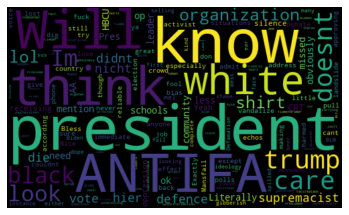

In [35]:
# Plotting a word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords= ' '.join([twts for twts in df['cleaned_tweet']])
wordCloud=WordCloud(width=500, height=300, random_state=21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:

# Obtaining Polarity Analysis
def getPolarityAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Sentiment']=df['Polarity'].apply(getPolarityAnalysis)
df.head()

,cleaned_tweet,Subjectivity,Polarity,Sentiment
0,Should we have CRT in schools We need a leader.,0.000000,0.000000,Neutral
1,Literally trump but ok,0.500000,0.500000,Positive
2,Pres. you missed the op to mention HBCU. obvio...,0.333333,-0.111111,Negative
3,THIS IS ANTIFA,0.000000,0.000000,Neutral
4,-,0.000000,0.000000,Neutral


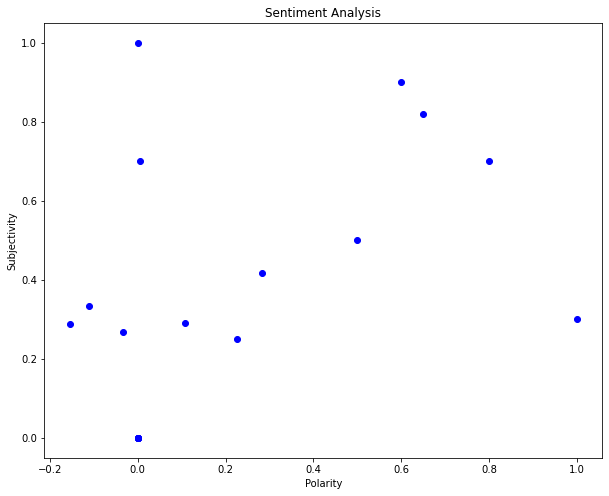

In [38]:

# Plotting polarity and subjectivity
plt.figure(figsize=(10,8))
plt.scatter(df['Polarity'], df['Subjectivity'], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.savefig('Resources/sentiment_test.png')
plt.show()